## Example 6: A transmural fiber with ICaL block and increased Ito

_This example requires OpenCL-capable hardware, drivers, and an OpenCL SDK._

We now repeat the previous example, but this time we make some pretty big changes to the model:

- Reduced ICaL (conductance changed from 0.0398 to 0.2 L/F/s)
- Depleted SR (initial value changed from 3.64 to 2.5 mM)
- Increased Ito (epi and mid-myocardial conductance increased from 0.294 to 0.7)
- +20mV voltage shift in Ito's activation gate
- +10mV voltage shift in Ito's inactivation gate

Finally, in the simulation we decrease the cell-to-cell conduction.

At the end of this example, we show how such changes can be made dynamically, in a reference model file that stays unmodified.
But for now, we keep it simple and load a model with some hard-coded changes:

In [1]:
import myokit

# Load the modified model and protocol
m, p, _ = myokit.load('tentusscher-2006-modified.mmt')

# Set the tissue dimensions
n_end = 60
n_mid = 45
n_epi = 60
nc = n_end + n_mid + n_epi

# Create a multi-cell simulation
s = myokit.SimulationOpenCL(m, p, ncells=nc, precision=myokit.DOUBLE_PRECISION)

# Decide which cells to pace
s.set_paced_cells(3)

# Set a step size
s.set_step_size(0.002)

# Add a scalar field representing different cell types (0:endo, 1:epi, 2:mid)
types = [0] * n_end + [2] * n_mid + [1] * n_epi
s.set_field('cell.type', types)

# Use a much lower conductance than before
g = 15
s.set_conductance(g)

Again we pre-pace for two beats (in a real-world simulation you'd want a lot more!).

In [2]:
r = myokit.ProgressPrinter(digits=-1)
s.pre(800, progress=r)

[0.0 minutes] 0 % done
[0.1 minutes] 10 % done, estimated 1.2 minutes remaining
[0.3 minutes] 20 % done, estimated 1.0 minutes remaining
[0.4 minutes] 30 % done, estimated 54 seconds remaining
[0.5 minutes] 40 % done, estimated 46 seconds remaining
[0.7 minutes] 50 % done, estimated 39 seconds remaining
[0.8 minutes] 60 % done, estimated 31 seconds remaining
[0.9 minutes] 70 % done, estimated 23 seconds remaining
[1.0 minutes] 80 % done, estimated 16 seconds remaining
[1.2 minutes] 90 % done, estimated 8 seconds remaining
[1.3 minutes] 100 % done, estimated 0 seconds remaining


And then run logged for two beats:

In [3]:
r = myokit.ProgressPrinter(digits=-1)
d = s.run(800, log_interval=0.1, log=['engine.time', 'membrane.V'], progress=r)

[0.0 minutes] 0 % done
[0.1 minutes] 10 % done, estimated 1.3 minutes remaining
[0.3 minutes] 20 % done, estimated 1.2 minutes remaining
[0.6 minutes] 30 % done, estimated 1.4 minutes remaining
[0.9 minutes] 40 % done, estimated 1.3 minutes remaining
[1.2 minutes] 50 % done, estimated 1.2 minutes remaining
[1.4 minutes] 60 % done, estimated 57 seconds remaining
[1.7 minutes] 70 % done, estimated 44 seconds remaining
[2.0 minutes] 80 % done, estimated 30 seconds remaining
[2.3 minutes] 90 % done, estimated 15 seconds remaining
[2.6 minutes] 100 % done, estimated 0 seconds remaining


We plot the AP for both beats, in various cells throughout the fiber:

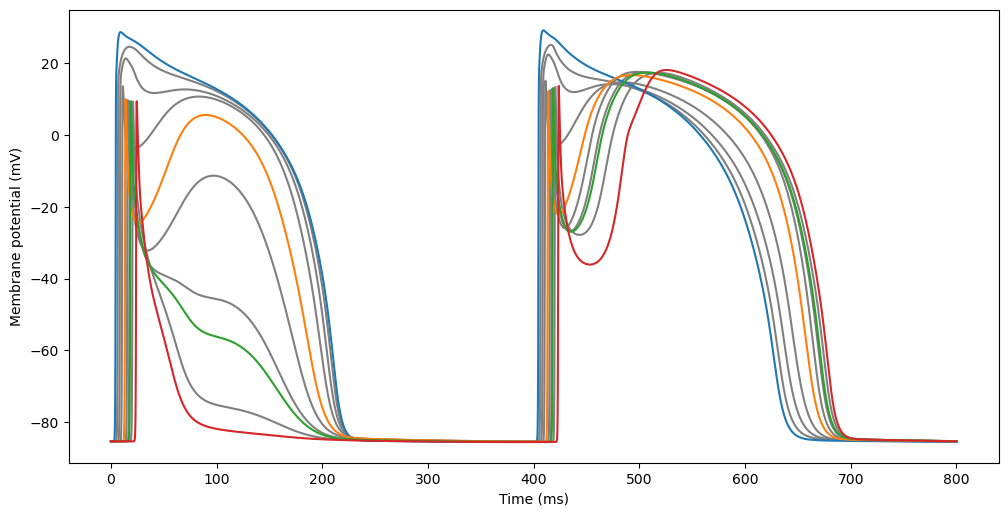

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6), dpi=100)
ax = fig.add_subplot()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential (mV)')
for n in [30, 45, 60, 95, 110, 130]:
    ax.plot(d['engine.time'], d['membrane.V', n], color='gray')
for n in [15, 80, 115, 155]:
    ax.plot(d['engine.time'], d['membrane.V', n])
plt.show()